In [1]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\Data\\OneDrive_1_7-3-2022'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [4]:
first_file = pd.read_csv('SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

second_file = pd.read_csv('SimData_2022.06.30_13.01.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

third_file = pd.read_csv('SimData_2022.06.30_13.05.32.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fourth_file = pd.read_csv('SimData_2022.06.30_13.42.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

In [5]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022"

fifth_file = pd.read_csv('SimData_2022.07.07_09.56.57.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

# adding this file to balance hover or not
sixth_file = pd.read_csv('SimData_2022.07.07_14.32.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022


In [6]:
df = pd.concat([first_file, second_file, third_file, fourth_file, fifth_file, sixth_file])
df

,datetime,_id,latitude,longitude,gpsAltitude,absoluteAltitude,magneticHeading,trueHeading,pitch,roll,...,hasMainRotorLowRpmWarning,hasMainRotorHighRpmWarning,hasTailRotorChipWarning,hasTransmissionChipCaution,hasTransmissionOilTemperatureWarning,hasTransmissionOilPressureWarning,timestamp,gpsDateTime,seconds,vil
0,2022-06-30 14:27:53.216,::1656613673.216,20.904799,-156.424679,36.82,0.12,204.071,213.554,1.594,0.665,...,False,False,False,False,False,False,2022-06-30T14:27:53.216Z,2022-06-30T14:27:53.216Z,1.656614e+09,-2
1,2022-06-30 14:27:53.234,::1656613673.234,20.904799,-156.424679,36.82,0.12,204.064,213.547,1.593,0.683,...,False,False,False,False,False,False,2022-06-30T14:27:53.234Z,2022-06-30T14:27:53.234Z,1.656614e+09,-2
2,2022-06-30 14:27:53.251,::1656613673.251,20.904799,-156.424679,36.82,0.12,204.058,213.541,1.593,0.707,...,False,False,False,False,False,False,2022-06-30T14:27:53.251Z,2022-06-30T14:27:53.251Z,1.656614e+09,-2
3,2022-06-30 14:27:53.271,::1656613673.271,20.904799,-156.424679,36.81,0.12,204.051,213.534,1.594,0.735,...,False,False,False,False,False,False,2022-06-30T14:27:53.271Z,2022-06-30T14:27:53.271Z,1.656614e+09,-2
4,2022-06-30 14:27:53.293,::1656613673.293,20.904799,-156.424679,36.81,0.12,204.043,213.526,1.596,0.770,...,False,False,False,False,False,False,2022-06-30T14:27:53.293Z,2022-06-30T14:27:53.293Z,1.656614e+09,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41207,2022-07-07 18:50:15.143,::1657234215.143,44.165597,-68.426752,109.09,0.04,90.264,74.400,2.206,0.465,...,False,False,False,False,False,False,2022-07-07T18:50:15.143Z,2022-07-07T18:50:15.143Z,1.657234e+09,-2
41208,2022-07-07 18:50:15.162,::1657234215.162,44.165597,-68.426752,109.09,0.04,90.264,74.400,2.206,0.465,...,False,False,False,False,False,False,2022-07-07T18:50:15.162Z,2022-07-07T18:50:15.162Z,1.657234e+09,-2
41209,2022-07-07 18:50:15.183,::1657234215.183,44.165597,-68.426752,109.09,0.04,90.264,74.400,2.206,0.465,...,False,False,False,False,False,False,2022-07-07T18:50:15.183Z,2022-07-07T18:50:15.183Z,1.657234e+09,-2
41210,2022-07-07 18:50:15.201,::1657234215.201,44.165597,-68.426752,109.09,0.04,90.264,74.399,2.207,0.466,...,False,False,False,False,False,False,2022-07-07T18:50:15.201Z,2022-07-07T18:50:15.201Z,1.657234e+09,-2


In [8]:
df2 = df[['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()

C:\Users\David\AppData\Local\Temp/ipykernel_8064/2067735615.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [9]:
df3['HoverOrNot'] = 0
df3['LeftHover'] = 0
df3['RightHover'] = 0

df3.loc[(df3['datetime'].between('2022-06-30 14:28:13' , '2022-06-30 14:33:12' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:10' , '2022-06-30 14:38:29' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:10' , '2022-06-30 14:43:40' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:46:00' , '2022-06-30 14:55:55' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 15:00:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:01:20' , '2022-06-30 15:07:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:07:38' , '2022-06-30 15:10:38' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:12:02' , '2022-06-30 15:18:30' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:20:18' , '2022-06-30 15:23:52' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:25:30' , '2022-06-30 15:30:17' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:36:45' , '2022-06-30 15:40:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:28' , '2022-06-30 15:55:20' , inclusive='both')),['HoverOrNot']] = 1



# 6/30 Left Hover
df3.loc[(df3['datetime'].between('2022-06-30 14:29:06' , '2022-06-30 14:30:44' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:36:47' , '2022-06-30 14:38:13' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:47' , '2022-06-30 14:42:05' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 14:57:45' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:59:04' , '2022-06-30 14:59:58' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:17:25' , '2022-06-30 15:18:09' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:39:03' , '2022-06-30 15:40:11' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:44:15' , '2022-06-30 15:45:08' , inclusive='both')),['LeftHover']] = 1


# 6/30 Right Hover

df3.loc[(df3['datetime'].between('2022-06-30 14:31:30' , '2022-06-30 14:32:50' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:59' , '2022-06-30 14:36:12' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:42:17' , '2022-06-30 14:43:22' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:55' , '2022-06-30 14:58:53' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:37:21' , '2022-06-30 15:38:40' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:48' , '2022-06-30 15:44:04' , inclusive='both')),['RightHover']] = 1




# Combine with the new data

df3.loc[(df3['datetime'].between('2022-07-07 13:58:38' , '2022-07-07 14:02:54' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:03:40' , '2022-07-07 14:11:19' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:14:55' , '2022-07-07 14:21:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:23:18' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:24:20' , '2022-07-07 14:35:00' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:00' , '2022-07-07 14:45:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:20' , inclusive='both')),['HoverOrNot']] = 1



# 7/7 Right Hover

df3.loc[(df3['datetime'].between('2022-07-07 14:00:15' , '2022-07-07 14:01:20' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:06:20' , '2022-07-07 14:07:12' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:08:46' , '2022-07-07 14:09:39' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:10:01' , '2022-07-07 14:10:58' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:20:32' , '2022-07-07 14:20:49' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:23:02' , '2022-07-07 14:23:18' , inclusive='both')),['RightHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:39:08' , '2022-07-07 14:39:36' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:40:37' , '2022-07-07 14:41:09' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:44:10' , '2022-07-07 14:45:06' , inclusive='both')),['RightHover']] = 1
df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:05' , inclusive='both')),['RightHover']] = 1



# 7/7 Left Hover
df3.loc[(df3['datetime'].between('2022-07-07 14:01:35' , '2022-07-07 14:02:41' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:04:10' , '2022-07-07 14:04:30' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:05:20' , '2022-07-07 14:06:06' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:07:31' , '2022-07-07 14:08:22' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:15:38' , '2022-07-07 14:15:50' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:22:42' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:36' , '2022-07-07 14:37:06' , inclusive='both')),['LeftHover']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:42:25' , '2022-07-07 14:42:59' , inclusive='both')),['LeftHover']] = 1



# Double check to see hasWeightOnWheels = 1, then set Hover Or Not = 0
df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0

In [14]:
print(len(df3[(df3['HoverOrNot'] == 1)])) #6310
print(len(df3[(df3['HoverOrNot'] == 0)])) #6645

6310
6645


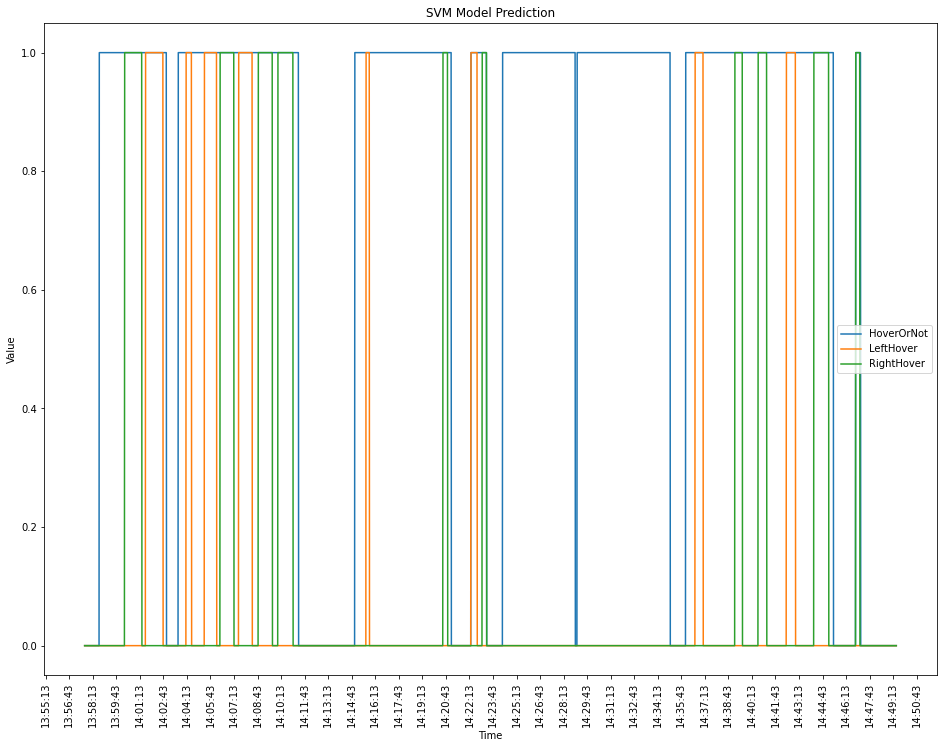

In [22]:
import matplotlib.dates as mdates

df_check = df3.loc[(df3['datetime'].between('2022-07-07' , '2022-07-07 14:50:59' , inclusive='both'))] 

plt.figure(figsize=(16, 12))
plt.plot('datetime','HoverOrNot',
         data = df_check,
         label = "HoverOrNot")
plt.plot('datetime','LeftHover',
         data = df_check,
         label = "LeftHover")
plt.plot('datetime','RightHover',
         data = df_check,
         label = "RightHover")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=90))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

<h2> Since hover data is only 1/4 of the dataset, hence we have to randomly select the same amount of data for not hover

In [ ]:
# Randomly sample dataset where hoverOrNot is 0
df4 = df3[(df3['HoverOrNot'] == 0)].sample(n=6310, replace=False, random_state=123458)

# Concat data from where HoverOrNot = 1 and HoverOrNot = 0

df5 = pd.concat([df3[(df3['HoverOrNot'] == 1)], df4], ignore_index=True)

# Shuffle data in random way
df5 = df5.sample(frac=1)

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']               
                
                
X = df5[feature_names]
y = df5['HoverOrNot']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
svm.get_params()

In [ ]:
# filename = 'D:/git/rotorcraft-project/david/svm_trained_model.sav'
# pickle.dump(svm, open(filename, 'wb'))

<h2> Using model to predict the validation file

<H4> Processing the validation file to make it into the same structure

In [24]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022"

# valid_data1 = pd.read_csv('SimData_2022.06.30_09.16.15.csv.roar.csv',
#                 parse_dates = {'datetime': ['date', 'time']},
#                 low_memory=False)

validation_file = pd.read_csv('SimData_2022.06.30_09.43.28.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

# validation_file = pd.concat([valid_data2], ignore_index=True)

validation_file = validation_file[['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude',
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()

validation_file['HoverOrNot'] = 0
validation_file['LeftHover'] = 0
validation_file['RightHover'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:11' , '2022-06-30 13:52:20' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:00' , '2022-06-30 14:00:14' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:12' , '2022-06-30 14:03:50' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:05:25' , '2022-06-30 14:16:45' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:18:10' , '2022-06-30 14:19:34' , inclusive='both')),['HoverOrNot']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:22:40' , '2022-06-30 14:24:40' , inclusive='both')),['HoverOrNot']] = 1


# Right Hover

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:48:49' , '2022-06-30 13:50:05' , inclusive='both')),['RightHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:59:20' , '2022-06-30 14:00:06' , inclusive='both')),['RightHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 14:02:38' , '2022-06-30 14:03:28' , inclusive='both')),['RightHover']] = 1


# Left Hover

validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:51:58' , '2022-06-30 13:52:20' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:53:15' , '2022-06-30 13:54:18' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:55:29' , '2022-06-30 13:56:15' , inclusive='both')),['LeftHover']] = 1
validation_file.loc[(validation_file['datetime'].between('2022-06-30 13:56:23' , '2022-06-30 13:57:13' , inclusive='both')),['LeftHover']] = 1




D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-3-2022


In [ ]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler.transform(X_validation)

In [ ]:
validation_svm = svm.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

In [ ]:
validation_file['HoverOrNot'] = validation_file['HoverOrNot'] * 10

In [ ]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = validation_file,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=90))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

<h2> Test again 7/10 file

In [27]:
%cd "D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022"

valid_data_710 = pd.read_csv('SimData_2022.07.07_09.29.40.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

# valid_data_710_2 = pd.read_csv('SimData_2022.07.07_09.56.57.csv.roar.csv',
#                 parse_dates = {'datetime': ['date', 'time']},
#                 low_memory=False)

# valid_data_623_3 = pd.read_csv('SimData_2022.06.23_11.22.59.csv.roar.csv',
#                 parse_dates = {'datetime': ['date', 'time']},
#                 low_memory=False)

# validation_file = pd.concat([valid_data_623_1,
#                              valid_data_623_2,
# #                              valid_data_623_3
#                             ], ignore_index=True)

validation_file = valid_data_710[['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
validation_file = validation_file.groupby(by=["datetime"], dropna=False).mean().reset_index()

validation_file['HoverOrNot'] = 0
validation_file['LeftHover'] = 0
validation_file['RightHover'] = 0

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:30:49' , '2022-07-07 13:34:28' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:36:10' , '2022-07-07 13:38:05' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:40:44' , '2022-07-07 13:42:14' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:43:40' , '2022-07-07 13:45:07' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:47:03' , '2022-07-07 13:52:09' , inclusive='both')),['HoverOrNot']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:53:12' , '2022-07-07 13:53:55' , inclusive='both')),['HoverOrNot']] = 1



# Right Hover

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:33:15' , '2022-07-07 13:34:15' , inclusive='both')),['RightHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:44:03' , '2022-07-07 13:44:49' , inclusive='both')),['RightHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:53:13' , '2022-07-07 13:53:50' , inclusive='both')),['RightHover']] = 1

#Left Hover

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:36:46' , '2022-07-07 13:37:45' , inclusive='both')),['LeftHover']] = 1

validation_file.loc[(validation_file['datetime'].between('2022-07-07 13:41:13' , '2022-07-07 13:42:11' , inclusive='both')),['LeftHover']] = 1




D:\School\Graduate 2022 Summer\Data\OneDrive_1_7-10-2022


C:\Users\David\AppData\Local\Temp/ipykernel_8064/3918553301.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_file['datetime'] = validation_file.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [ ]:
X_validation = validation_file[feature_names]
y_validation = validation_file['HoverOrNot']


X_valid = scaler.transform(X_validation)

In [ ]:
file_loaded = 'D:/git/rotorcraft-project/david/svm_trained_model.sav'
svm_loaded = pickle.load(open(file_loaded, 'rb'))

In [ ]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y_validation,validation_svm))

# For visulization only, HoverOrNot x 10 and SVM predicted x 20 to show on the graph

In [ ]:
validation_file['HoverOrNot'] = validation_file['HoverOrNot'] / 10

In [ ]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20
# validation_file.loc[(validation_file['hasWeightOnWheels'] == 1),['svm_predicted']] = 0

plt.figure(figsize=(16, 12))
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted", color="orange")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot", color="r")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend()
plt.show()

<h1> using rolling window to calculate mean of predicted svm in 20s

In [ ]:
validation_file['svm_predicted'] = validation_svm 
result = []
window = [5,10,15,17,20,30]
rolling_mean = [0.5,0.6,0.7]

for i in window:
    for j in rolling_mean:
        temp_validation_file = pd.DataFrame()
        temp_validation_file = validation_file.copy(deep=True)


        temp_validation_file['svm_predicted_rolling_mean'] = temp_validation_file['svm_predicted'].rolling(window = i).mean().fillna(0)
        temp_validation_file['svm_predicted_after_rolling_mean'] = 0

        temp_validation_file.loc[temp_validation_file['svm_predicted_rolling_mean'] > j,['svm_predicted_after_rolling_mean']] = 1

        result.append((i,j,accuracy_score(temp_validation_file['HoverOrNot'],temp_validation_file['svm_predicted_after_rolling_mean'])))

for i in result:
    print('Accuracy Score for %ss rolling windows of with %s rolling mean : %s' %(i[0],i[1],i[2]))
    

In [ ]:
validation_file['svm_predicted_rolling_mean'] = validation_file['svm_predicted'].rolling(window = 17).mean().fillna(0)

In [ ]:
validation_file['svm_predicted_after_rolling_mean'] = 0

validation_file.loc[validation_file['svm_predicted_rolling_mean'] > 0.6,['svm_predicted_after_rolling_mean']] = 1

In [ ]:
print("Accuracy of Model after second processing:",accuracy_score(validation_file['HoverOrNot'],validation_file['svm_predicted_after_rolling_mean']))

In [ ]:
import matplotlib.dates as mdates

validation_file['svm_predicted'] = validation_svm * 20
validation_file['svm_predicted_after_rolling_mean'] = validation_file['svm_predicted_after_rolling_mean'] * 30
validation_file['HoverOrNot'] = validation_file['HoverOrNot']  * 10

plt.figure(figsize=(16, 12))
plt.plot('datetime','groundSpeed',
         data = validation_file,
         label = "groundSpeed")
plt.plot('datetime','svm_predicted',
         data = validation_file,
         label = "svm_predicted", color="orange")
plt.plot('datetime','svm_predicted_after_rolling_mean',
         data = validation_file,
         label = "svm_predicted_after_rolling_mean", color="green")
plt.plot('datetime','HoverOrNot',
         data = validation_file,
         label = "HoverOrNot", color="r")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('SVM Model Prediction')
plt.legend(loc=1)
plt.show()

In [ ]:
first_index = []

for j,i in enumerate(validation_file['svm_predicted_after_rolling_mean']):
    if j == 0:
        first_index.append([i,j])
    else:
        if i != validation_file['svm_predicted_after_rolling_mean'][j-1]:
            first_index.append([validation_file['svm_predicted_after_rolling_mean'][j-1],j-1])
            first_index.append([i,j])

arr = []
for i,j in enumerate(first_index):
    if i!= 0 and j[0] == first_index[i-1][0] :
        arr.append(dict(Task="Task %s"%i,
                        Start=validation_file['datetime'][first_index[i-1][1]],
                        Finish=validation_file['datetime'][j[1]],
                        Resource="{}".format("Hover" if j[0]==30 else "Not Hover")
                       )
                  )
arr

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(arr)

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
fig.show()